In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df_ad_t = pd.read_csv('ad_title.csv')

In [3]:
df_ad_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18122 entries, 0 to 18121
Data columns (total 2 columns):
adId      18122 non-null int64
wordId    18122 non-null int64
dtypes: int64(2)
memory usage: 283.3 KB


In [4]:
arr = pd.DataFrame(df_ad_t['wordId'])
arr = arr.drop_duplicates().reset_index()
print(arr)

      index  wordId
0         0      24
1         1      25
2         2      26
3         3      27
4         4      28
...     ...     ...
2103  18051    2681
2104  18058    2682
2105  18084    1965
2106  18094    2683
2107  18101    1861

[2108 rows x 2 columns]


In [5]:
arr['index'] = arr['wordId']
arr['wordId'] = arr['wordId'].astype('object')
print(arr)

      index wordId
0        24     24
1        25     25
2        26     26
3        27     27
4        28     28
...     ...    ...
2103   2681   2681
2104   2682   2682
2105   1965   1965
2106   2683   2683
2107   1861   1861

[2108 rows x 2 columns]


In [6]:
df_inx = pd.get_dummies(arr)
df_inx.head(10)

,index,wordId_0,wordId_1,wordId_3,wordId_4,wordId_5,wordId_6,wordId_7,wordId_8,wordId_9,...,wordId_2674,wordId_2675,wordId_2676,wordId_2677,wordId_2678,wordId_2679,wordId_2680,wordId_2681,wordId_2682,wordId_2683
0,24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,29,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,32,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_inx.rename(columns={'index':'wordId'}, inplace = True)
df_inx.head(10)

,wordId,wordId_0,wordId_1,wordId_3,wordId_4,wordId_5,wordId_6,wordId_7,wordId_8,wordId_9,...,wordId_2674,wordId_2675,wordId_2676,wordId_2677,wordId_2678,wordId_2679,wordId_2680,wordId_2681,wordId_2682,wordId_2683
0,24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,29,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,32,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_inx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2108 entries, 0 to 2107
Columns: 2109 entries, wordId to wordId_2683
dtypes: int64(1), uint8(2108)
memory usage: 4.3 MB


In [9]:
df_ad_title = pd.merge(df_ad_t, df_inx, how = 'inner', on = 'wordId')
df_ad_title.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18122 entries, 0 to 18121
Columns: 2110 entries, adId to wordId_2683
dtypes: int64(2), uint8(2108)
memory usage: 36.8 MB


In [10]:
df_ad_title.head(15)

,adId,wordId,wordId_0,wordId_1,wordId_3,wordId_4,wordId_5,wordId_6,wordId_7,wordId_8,...,wordId_2674,wordId_2675,wordId_2676,wordId_2677,wordId_2678,wordId_2679,wordId_2680,wordId_2681,wordId_2682,wordId_2683
0,6,24,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,28,24,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1801,24,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2320,24,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3087,24,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3107,24,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,25,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,28,25,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,509,25,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1801,25,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_ad_t = df_ad_t.groupby(['wordId']).agg({'adId':'sum'})

In [18]:
df_ad_t.max()

count    3551845
dtype: int64

In [13]:
df_ad_t.rename(columns = {'adId':'count'}, inplace = True)
df_ad_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2108 entries, 0 to 2683
Data columns (total 1 columns):
count    2108 non-null int64
dtypes: int64(1)
memory usage: 32.9 KB


In [14]:
df_ad_title_g = pd.merge(df_ad_t, df_ad_title, how = 'inner', on = 'wordId')
df_ad_title_g.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18122 entries, 0 to 18121
Columns: 2111 entries, wordId to wordId_2683
dtypes: int64(3), uint8(2108)
memory usage: 37.0 MB


In [23]:
df_ad_title_g.head(10)

,wordId,count,adId,wordId_0,wordId_1,wordId_3,wordId_4,wordId_5,wordId_6,wordId_7,...,wordId_2674,wordId_2675,wordId_2676,wordId_2677,wordId_2678,wordId_2679,wordId_2680,wordId_2681,wordId_2682,wordId_2683
0,0,61779.0,3914,16.18673,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,61779.0,4277,16.18673,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,61779.0,5104,16.18673,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,61779.0,5226,16.18673,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,61779.0,5227,16.18673,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,61779.0,5649,16.18673,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,61779.0,5756,16.18673,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0,61779.0,6356,16.18673,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0,61779.0,6575,16.18673,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0,61779.0,6823,16.18673,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df_ad_title_g.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18122 entries, 0 to 18121
Columns: 2111 entries, wordId to wordId_2683
dtypes: int64(3), uint8(2108)
memory usage: 37.0 MB


In [17]:
for i in range(3,2111):
    df_ad_title_g.iloc[:,i] = df_ad_title_g.iloc[:,i].astype('float64')
df_ad_title_g.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18122 entries, 0 to 18121
Columns: 2111 entries, wordId to wordId_2683
dtypes: float64(2108), int64(3)
memory usage: 292.0 MB


In [19]:
for i in range(3,2111):
    df_ad_title_g.iloc[:,i] = df_ad_title_g.iloc[:,i].astype('float64') * 1000000
df_ad_title_g.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18122 entries, 0 to 18121
Columns: 2111 entries, wordId to wordId_2683
dtypes: float64(2108), int64(3)
memory usage: 292.0 MB


In [21]:
df_ad_title_g['count'] = df_ad_title_g['count'].astype('float64')

In [22]:
for i in range(3,2111):
    df_ad_title_g.iloc[:,i] = df_ad_title_g.iloc[:,i].astype('float64') / df_ad_title_g['count']
df_ad_title_g.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18122 entries, 0 to 18121
Columns: 2111 entries, wordId to wordId_2683
dtypes: float64(2109), int64(2)
memory usage: 292.0 MB


In [24]:
df_ad_title_g.head(100)

,wordId,count,adId,wordId_0,wordId_1,wordId_3,wordId_4,wordId_5,wordId_6,wordId_7,...,wordId_2674,wordId_2675,wordId_2676,wordId_2677,wordId_2678,wordId_2679,wordId_2680,wordId_2681,wordId_2682,wordId_2683
0,0,61779.0,3914,16.18673,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,61779.0,4277,16.18673,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,61779.0,5104,16.18673,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,61779.0,5226,16.18673,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,61779.0,5227,16.18673,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4,41715.0,7318,0.00000,0.0,0.0,23.972192,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,5,211541.0,450,0.00000,0.0,0.0,0.000000,4.727216,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,5,211541.0,678,0.00000,0.0,0.0,0.000000,4.727216,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,5,211541.0,3082,0.00000,0.0,0.0,0.000000,4.727216,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#df_ad_title = df_ad_title.drop(['index'], axis=1)

In [25]:
df_ad_title = df_ad_title_g.groupby(['adId'])[df_ad_title.filter(regex='wordId_.*').columns].sum()

In [26]:
df_ad_title.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3252 entries, 6 to 7867
Columns: 2108 entries, wordId_0 to wordId_2683
dtypes: float64(2108)
memory usage: 52.3 MB


In [28]:
df_ad_title.head(10)

,wordId_0,wordId_1,wordId_3,wordId_4,wordId_5,wordId_6,wordId_7,wordId_8,wordId_9,wordId_10,...,wordId_2674,wordId_2675,wordId_2676,wordId_2677,wordId_2678,wordId_2679,wordId_2680,wordId_2681,wordId_2682,wordId_2683
adId,,,,,,,,,,,,,,,,,,,,,
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.966254,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.55317,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
X = df_ad_title.iloc[:, 1:2109].values

In [30]:
X

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 63.58087487]])

In [35]:
kmeans = KMeans(n_clusters=20, init='k-means++', max_iter=500, n_init=10)
pred_y = kmeans.fit_predict(X)


In [36]:
df_ad_title['Cluster'] = pred_y

In [37]:
df_ad_title

,wordId_0,wordId_1,wordId_3,wordId_4,wordId_5,wordId_6,wordId_7,wordId_8,wordId_9,wordId_10,...,wordId_2675,wordId_2676,wordId_2677,wordId_2678,wordId_2679,wordId_2680,wordId_2681,wordId_2682,wordId_2683,Cluster
adId,,,,,,,,,,,,,,,,,,,,,
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.966254,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7862,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
7863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
7865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018676EDB388>]],
      dtype=object)

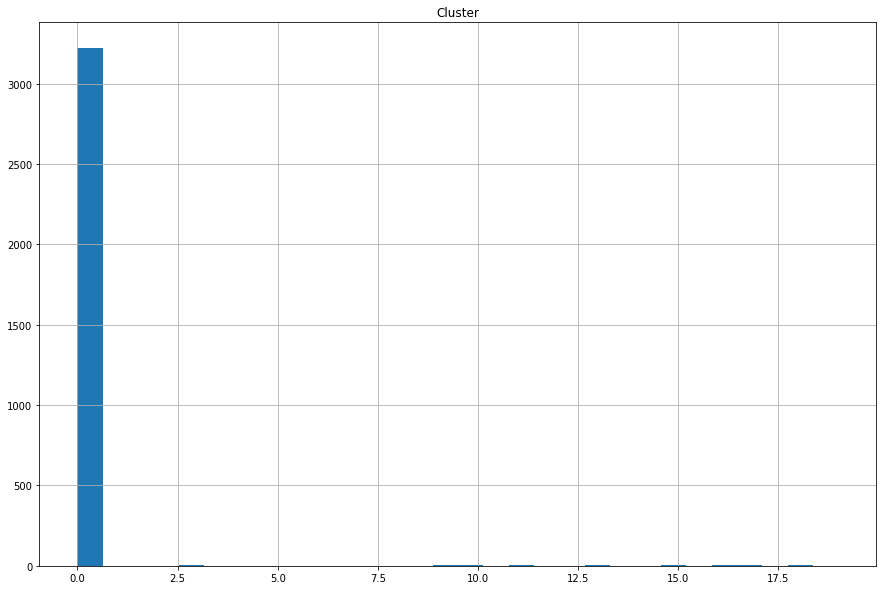

In [38]:
df_ad_title.hist(column='Cluster',bins=30, figsize=(15, 10))